## Personalized Financial Planning & Investment Management 

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

# income dataset

In [5]:
Data = pd.read_excel("C:\\Users\\KARTHIK\\OneDrive\\Desktop\\ALL FILES\\SET2\\PERSONAL DATASET.xlsx",engine='openpyxl')
Data

,Name,Age,MonthlyIncome,Department,JobRole
0,CATHERINE,18,25233,Research & Development,Laboratory Technician
1,KEVIN J,18,9724,Sales,Sales Representative
2,JOY M,18,8059,Sales,Sales Representative
3,ELIZABETH S,18,13493,Research & Development,Research Scientist
4,JASMINE,20,13556,Research & Development,Laboratory Technician
...,...,...,...,...,...
1475,KAREN T.,60,3854,Research & Development,Manager
1476,DWIGHT D.,55,2845,Sales,Sales Executive
1477,ISABEL K,60,11924,Sales,Sales Executive
1478,TYLER R,55,10893,Sales,Sales Executive


In [6]:
# null check
Data.isnull().sum()

Name             0
Age              0
MonthlyIncome    0
Department       0
JobRole          0
dtype: int64

## RULE BASED INCOME SPLIT ( 50/30/20 )

In [7]:
Data['Needs'] = Data['MonthlyIncome'] * 0.50
Data['Wants'] = Data['MonthlyIncome'] * 0.30
Data['Savings'] = Data['MonthlyIncome'] * 0.20

# Select and display only the relevant columns
Data1 = Data[['Name', 'MonthlyIncome', 'Needs', 'Wants', 'Savings']]

In [7]:
Data1

,Name,MonthlyIncome,Needs,Wants,Savings
0,CATHERINE,25233,12616.5,7569.9,5046.6
1,KEVIN J,9724,4862.0,2917.2,1944.8
2,JOY M,8059,4029.5,2417.7,1611.8
3,ELIZABETH S,13493,6746.5,4047.9,2698.6
4,JASMINE,13556,6778.0,4066.8,2711.2
...,...,...,...,...,...
1475,KAREN T.,3854,1927.0,1156.2,770.8
1476,DWIGHT D.,2845,1422.5,853.5,569.0
1477,ISABEL K,11924,5962.0,3577.2,2384.8
1478,TYLER R,10893,5446.5,3267.9,2178.6


In [8]:
Data_invest = Data[['Name','Age','MonthlyIncome','Savings']]
Data_invest

,Name,Age,MonthlyIncome,Savings
0,CATHERINE,18,25233,5046.6
1,KEVIN J,18,9724,1944.8
2,JOY M,18,8059,1611.8
3,ELIZABETH S,18,13493,2698.6
4,JASMINE,20,13556,2711.2
...,...,...,...,...
1475,KAREN T.,60,3854,770.8
1476,DWIGHT D.,55,2845,569.0
1477,ISABEL K,60,11924,2384.8
1478,TYLER R,55,10893,2178.6


##  RISK PERCENTAGE

In [9]:
Data_invest['Equity(%)'] = 100 - Data_invest['Age']
Data_invest['Other Assets(%)'] = Data_invest['Age']
Data_invest

,Name,Age,MonthlyIncome,Savings,Equity(%),Other Assets(%)
0,CATHERINE,18,25233,5046.6,82,18
1,KEVIN J,18,9724,1944.8,82,18
2,JOY M,18,8059,1611.8,82,18
3,ELIZABETH S,18,13493,2698.6,82,18
4,JASMINE,20,13556,2711.2,80,20
...,...,...,...,...,...,...
1475,KAREN T.,60,3854,770.8,40,60
1476,DWIGHT D.,55,2845,569.0,45,55
1477,ISABEL K,60,11924,2384.8,40,60
1478,TYLER R,55,10893,2178.6,45,55


In [10]:
Age=20
Equity = 100 - Age
Other_Assets = 100-Equity

print(f"Equity Allocation Percentage(%) : {Equity}%")
print(f"Other Assets Allocation Percentage(%) : {Other_Assets}%")

Equity Allocation Percentage(%) : 80%
Other Assets Allocation Percentage(%) : 20%


Enter the person's name: JOY M
Age: 18 years
Risk They Can Take: 82.00%


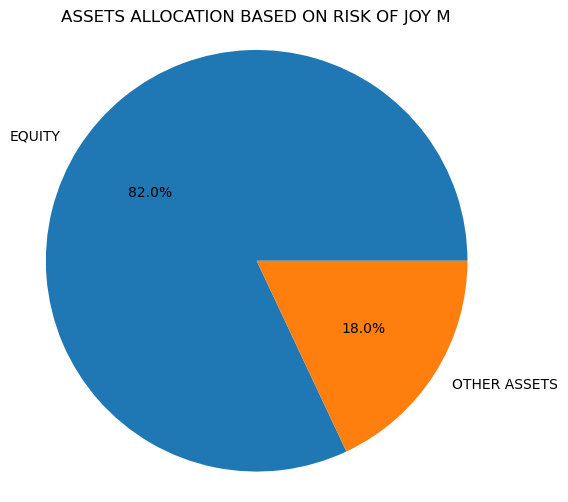

In [11]:
def calculate_risk_percentage(name):
    person_data = Data[Data['Name'] == name]
    if person_data.empty:
        print("Person not found in the dataset.")
        return

    age = person_data['Age'].values[0]
    
    # Calculate risk percentage for the person
    risk_percentage = 100 - age
    
    print(f"Age: {age} years")
    print(f"Risk They Can Take: {risk_percentage:.2f}%")
    
    # pie chart
    plt.figure(figsize=(6, 6))
    plt.pie([risk_percentage, age], labels=['EQUITY', 'OTHER ASSETS'], autopct='%1.1f%%')
    plt.title(f'ASSETS ALLOCATION BASED ON RISK OF {name}')
    plt.axis('equal')
    plt.show()

# Example usage
person_name = input("Enter the person's name: ")
calculate_risk_percentage(person_name)

## FUND DATA

In [12]:
Fund_Data = pd.read_csv("C:\\Users\\KARTHIK\\OneDrive\\Desktop\\SET2\\FUND.csv")
Fund_Data.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [13]:
def get_scheme_details(scheme_name):
    scheme_details = Fund_Data[Fund_Data['scheme_name'] == scheme_name]
    return scheme_details

# Example usage:
scheme_name = input("Enter the scheme name: ")
scheme_details_df = get_scheme_details(scheme_name)

if not scheme_details_df.empty:
    print("Scheme Details:")
    print("**************************************")
    for index, row in scheme_details_df.iterrows():
        print(f"Scheme Name: {row['scheme_name']}")
        print(f"Minimum SIP: {row['min_sip']}")
        print(f"Minimum Lumpsum: {row['min_lumpsum']}")
        print(f"Expense Ratio: {row['expense_ratio']}")
        print(f"Fund Size (in crore rupees): {row['fund_size_cr']}")
        print(f"Fund Age (in years): {row['fund_age_yr']}")
        print(f"Fund Manager: {row['fund_manager']}")
        print(f"Sortino Ratio: {row['sortino']}")
        print(f"Alpha Coefficient: {row['alpha']}")
        print(f"Standard Deviation: {row['sd']}")
        print(f"Beta Coefficient: {row['beta']}")
        print(f"Sharpe Ratio: {row['sharpe']}")
        print(f"Risk Level: {row['risk_level']}")
        print(f"AMC Name: {row['amc_name']}")
        print(f"Rating: {row['rating']}")
        print(f"Category: {row['category']}")
        print(f"Sub-Category: {row['sub_category']}")
        print(f"Returns (1 Year): {row['returns_1yr']}")
        print(f"Returns (3 Years): {row['returns_3yr']}")
        print(f"Returns (5 Years): {row['returns_5yr']}")
        print()
else:
    print("Scheme not found in the dataset.")


Enter the scheme name: Aditya Birla SL Asset Allocator FoF-Dir Growth
Scheme Details:
**************************************
Scheme Name: Aditya Birla SL Asset Allocator FoF-Dir Growth
Minimum SIP: 1000
Minimum Lumpsum: 1000
Expense Ratio: 0.53
Fund Size (in crore rupees): 157.0
Fund Age (in years): 10
Fund Manager: Vinod Narayan Bhat
Sortino Ratio: 3.44
Alpha Coefficient: 2.67
Standard Deviation: 10.58
Beta Coefficient: 0.67
Sharpe Ratio: 1.42
Risk Level: 5
AMC Name: Aditya Birla Sun Life Mutual Fund
Rating: 3
Category: Other
Sub-Category: FoFs Domestic
Returns (1 Year): 2.0
Returns (3 Years): 18.9
Returns (5 Years): 9.7



## SEARCH FOR MANAGAER INFORMATION

In [13]:
# pip install googlesearch-python

In [14]:
from googlesearch import search

# Function to search for fund managers on Google and extract search results
def search_fund_managers(Manager_name, num_results=5):
    search_results = search(Manager_name, num_results=num_results)
    return search_results

Manager_name = "Lovelish Solanki"
num_results = 5 
search_results = search_fund_managers(Manager_name, num_results)

# Print the search results
print("Search Results:")
for idx, result in enumerate(search_results, start=1):
    print(f"{idx}. {result}")


Search Results:
1. https://mutualfund.adityabirlacapital.com/about-us/investment-team/lovelish-solanki
2. https://in.linkedin.com/in/lovelish-solanki-a041173b
3. https://www.paytmmoney.com/mutual-funds/fund-manager/lovelish-solanki/151
4. https://www.icicidirect.com/mutual-funds/fund-manager/lovelish-solanki/672
5. https://in.linkedin.com/in/lovelish-solanki-a9020230
6. https://www.investonline.in/mutual-funds/fund-manager/400004/537/lovelish-solanki


## TECHNICAL ANALYSIS

In [15]:
import pandas as pd

# Define person's name
person_name = input("Enter the name of the person: ")

# Find the person's row in the dataset
person_row = Data_invest[Data_invest['Name'] == person_name]

if not person_row.empty:
    # Retrieve person's age, savings, equity allocation percentage, and other assets allocation percentage from the dataset
    person_age = person_row['Age'].values[0]
    person_savings = person_row['Savings'].values[0]
    equity_allocation_percentage = person_row['Equity(%)'].values[0]
    other_assets_allocation_percentage = person_row['Other Assets(%)'].values[0]

    # Print person's age and total savings amount
    print(f"Age of {person_name}: {person_age} years")
    print("***********************************************")
    print(f"Total Savings of {person_name}: {person_savings}")

    # Print equity allocation percentage and other assets allocation percentage
    print(f"Equity Allocation Percentage for {person_name}: {equity_allocation_percentage}%")
    print(f"Other Assets Allocation Percentage for {person_name}: {other_assets_allocation_percentage}%")

    # Check if the person is above 50 years old
    if person_age > 50:
        available_amount = person_savings * (equity_allocation_percentage / 100)

        # Convert 'alpha' and 'beta' columns to numeric (float) type, ignoring errors
        Fund_Data['alpha'] = pd.to_numeric(Fund_Data['alpha'], errors='coerce')
        Fund_Data['beta'] = pd.to_numeric(Fund_Data['beta'], errors='coerce')

        # Define conditions
        condition_category = Fund_Data['category'] == 'Equity'
        condition_rating = Fund_Data['rating'].isin([4, 5])  # Rating 4 or 5
        condition_risk_level = Fund_Data['risk_level'].between(1, 5)  # Risk level between 1 and 5
        condition_alpha = Fund_Data['alpha'] > 0
        condition_beta = (Fund_Data['beta'] > 0) & (Fund_Data['beta'] <= 1)

        # Apply conditions to filter funds
        selected_funds = Fund_Data[condition_rating & condition_category & condition_risk_level & condition_alpha & condition_beta]

                # Split savings amount according to equity allocation percentage
        equity_investment_amount = available_amount
        other_assets_investment_amount = person_savings - available_amount

        # Print the split amounts
        print("***********************************************")
        print("\nInvestment Amounts:")
        print(f"Equity Investment Amount: {equity_investment_amount}")
        print(f"Other Assets Investment Amount: {other_assets_investment_amount}")
        # Display the selected funds and equity allocation percentage in DataFrame format
        print("\nSelected Funds:")
        print(selected_funds[['scheme_name','risk_level', 'rating']])

    else:
        print("\nThe individual is not above 50 years old. No special conditions applied.")
else:
    print(f"\nPerson '{person_name}' not found in the dataset.")


Enter the name of the person: JOY M
Age of JOY M: 18 years
***********************************************
Total Savings of JOY M: 1611.8000000000002
Equity Allocation Percentage for JOY M: 82%
Other Assets Allocation Percentage for JOY M: 18%

The individual is not above 50 years old. No special conditions applied.


In [16]:
Data_invest

,Name,Age,MonthlyIncome,Savings,Equity(%),Other Assets(%)
0,CATHERINE,18,25233,5046.6,82,18
1,KEVIN J,18,9724,1944.8,82,18
2,JOY M,18,8059,1611.8,82,18
3,ELIZABETH S,18,13493,2698.6,82,18
4,JASMINE,20,13556,2711.2,80,20
...,...,...,...,...,...,...
1475,KAREN T.,60,3854,770.8,40,60
1476,DWIGHT D.,55,2845,569.0,45,55
1477,ISABEL K,60,11924,2384.8,40,60
1478,TYLER R,55,10893,2178.6,45,55


In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


features = ['Age', 'Savings', 'Equity(%)', 'Other Assets(%)']  # Features used for prediction
target = 'Savings'  # Target variable

X = Data_invest[features]
y = Data_invest[target]

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
model.fit(X, y)

# Predict
person_name = input("Enter the name of the person: ")

# Find the person's row in the dataset
person_row = Data_invest[Data_invest['Name'] == person_name]

if not person_row.empty:
    person_features = person_row[features].values

    predicted_savings = model.predict(person_features)[0]
    
    # Print person's age and total savings amount
    print(f"Age of {person_name}: {person_features[0][0]} years")
    print("***********************************************")
    print(f"Total Savings of {person_name}: {predicted_savings}")

    equity_allocation_percentage = person_features[0][2]
    # Check if the person is above 50 years old
    if person_features[0][0] > 50:
        available_amount = predicted_savings * (equity_allocation_percentage / 100)

        # Convert 'alpha' and 'beta' columns to numeric (float) type, ignoring errors
        Fund_Data['alpha'] = pd.to_numeric(Fund_Data['alpha'], errors='coerce')
        Fund_Data['beta'] = pd.to_numeric(Fund_Data['beta'], errors='coerce')

        # Define conditions
        condition_category = Fund_Data['category'] == 'Equity'
        condition_rating = Fund_Data['rating'].isin([4, 5])  # Rating 4 or 5
        condition_risk_level = Fund_Data['risk_level'].between(1, 5)  # Risk level between 1 and 5
        condition_alpha = Fund_Data['alpha'] > 0
        condition_beta = (Fund_Data['beta'] > 0) & (Fund_Data['beta'] <= 1)

        # Apply conditions to filter funds
        selected_funds = Fund_Data[condition_rating & condition_category & condition_risk_level & condition_alpha & condition_beta]

        # Split savings amount according to equity allocation percentage
        equity_investment_amount = available_amount
        other_assets_investment_amount = predicted_savings - available_amount

        # Print the split amounts
        print("***********************************************")
        print("\nInvestment Amounts:")
        print(f"Equity Investment Amount: {equity_investment_amount}")
        print(f"Other Assets Investment Amount: {other_assets_investment_amount}")
        # Display the selected funds and equity allocation percentage in DataFrame format
        print("\nSelected Funds:")
        print(selected_funds[['scheme_name', 'risk_level', 'rating']])

    else:
        print("\nThe individual is not above 50 years old. No special conditions applied.")
else:
    print(f"\nPerson '{person_name}' not found in the dataset.")


Enter the name of the person: JOY M
Age of JOY M: 18.0 years
***********************************************
Total Savings of JOY M: 1609.9260000000008

The individual is not above 50 years old. No special conditions applied.


### Model develop

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

DataF = pd.read_excel("C:\\Users\\KARTHIK\\OneDrive\\Desktop\\SET2\\FINALDATA.xlsx", engine='openpyxl')

DataF.dropna(subset=['scheme_name'], inplace=True)

DataF['alpha'] = pd.to_numeric(DataF['alpha'], errors='coerce')
DataF['beta'] = pd.to_numeric(DataF['beta'], errors='coerce')

# Define features and target variable
X = DataF[['Age', 'MonthlyIncome', 'alpha', 'beta', 'rating', 'risk_level', 'fund_age_yr']]  # Features
y = DataF['category']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.fillna(X_train.mean(), inplace=True)

# Handle Infinity values by replacing them with large finite values
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(1e10, inplace=True) 

# Initialize the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model with modified data
model.fit(X_train, y_train)

def allocate_funds_based_on_age(person_age, savings):
    equity_percentage = 100 - person_age
    equity_allocation_amount = savings * (equity_percentage / 100)
    other_assets_allocation_amount = savings - equity_allocation_amount
    return equity_allocation_amount, other_assets_allocation_amount

# Get user input for age and monthly income
person_name = input("Enter the name of the person: ")
person_age = int(input("Enter the age of the person: "))
person_monthly_income = float(input("Enter the monthly income of the person: "))

# Calculate the amount allocated for investment
savings = person_monthly_income * 0.20

print(f"\nAmount allocated for investment for {person_name}: {savings}")

# Allocate funds based on age using the function
equity_allocation_amount, other_assets_allocation_amount = allocate_funds_based_on_age(person_age, savings)

# Print allocation amounts for each category
print(f"Equity Allocation Amount for {person_name}: {equity_allocation_amount}")
print(f"Other Assets Allocation Amount for {person_name}: {other_assets_allocation_amount}")

person_data = [[person_age, person_monthly_income, 0, 0, 0, 0, 0]]


# Make predictions using the trained model
predicted_category = model.predict(person_data)[0]

if person_age > 50:
    selected_funds_equity = DataF[(DataF['category'] == "Equity") & (DataF['Age'] > 50) & (DataF['rating'].isin([3,4, 5])) & (DataF['risk_level'].isin([1, 2, 3, 4, 5,6])) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) >= 0) & (DataF['beta'].astype(float) <= 0.5) & (DataF['fund_age_yr'] > 5)].head(1)
elif person_age >= 30 and person_age <= 50:
    selected_funds_equity = DataF[(DataF['category'] == "Equity") & (DataF['Age'] >= 30) & (DataF['Age'] <= 50) & (DataF['rating'].isin([3, 4, 5])) & (DataF['risk_level'].isin([1, 2, 3, 4, 5, 6, 7])) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) > 0.5) & (DataF['beta'].astype(float) <= 1) & (DataF['fund_age_yr'] > 2)].head(1)
else:
    selected_funds_equity = DataF[(DataF['category'] == "Equity") & (DataF['Age'] < 30) & (DataF['rating'].isin([3, 4, 5])) & (DataF['risk_level'].isin(range(1, 11))) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) >= 1) & (DataF['fund_age_yr'] > 2)].head(1)

if person_age > 50:
    selected_funds_other = DataF[(DataF['category'] != "Equity") & (DataF['Age'] > 50) & (DataF['rating'].isin([4, 5])) & (DataF['risk_level'].isin([4, 5])) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) >= 0) & (DataF['beta'].astype(float) <= 0.5) & (DataF['fund_age_yr'] > 5)].head(1)
elif person_age >= 30 and person_age <= 50:
    selected_funds_other = DataF[(DataF['category'] != "Equity") & (DataF['Age'] >= 30) & (DataF['Age'] <= 50) & (DataF['rating'].isin([3, 4, 5])) & (DataF['risk_level'].isin([1, 2, 3, 4, 5, 6, 7])) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) > 0.5) & (DataF['beta'].astype(float) <= 1) & (DataF['fund_age_yr'] > 2)].head(1)
else:
    selected_funds_other = DataF[(DataF['category'] != "Equity") & (DataF['Age'] < 30) & (DataF['rating'].isin([3, 4, 5])) & (DataF['risk_level'].isin(range(1, 11))) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) >= 1) & (DataF['fund_age_yr'] > 2)].head(1)

print("\nDetails about the predicted funds (Equity category):")
for idx, row in selected_funds_equity.iterrows():
    print(f"\nScheme Name: {row['scheme_name']}")
    print(f"Rating: {row['rating']}")
    print(f"Risk Level: {row['risk_level']}")
    print(f"Expense Ratio: {row['expense_ratio']}")
    print(f"Category: {row['category']}")
    print(f"Minimum SIP: {row['min_sip']}")
    print("********************************************************")
    print(f"1-Year Return: {row['returns_1yr']}")
    print(f"3-Year Return: {row['returns_3yr']}")

print("\nDetails about the predicted funds (Other categories):")
for idx, row in selected_funds_other.iterrows():
    print(f"\nScheme Name: {row['scheme_name']}")
    print(f"Rating: {row['rating']}")
    print(f"Risk Level: {row['risk_level']}")
    print(f"Expense Ratio: {row['expense_ratio']}")
    print(f"Category: {row['category']}")
    print(f"Minimum SIP: {row['min_sip']}")
    print("********************************************************")
    print(f"1-Year Return: {row['returns_1yr']}")
    print(f"3-Year Return: {row['returns_3yr']}")


Enter the name of the person: karthik
Enter the age of the person: 23
Enter the monthly income of the person: 12000

Amount allocated for investment for karthik: 2400.0
Equity Allocation Amount for karthik: 1848.0
Other Assets Allocation Amount for karthik: 552.0

Details about the predicted funds (Equity category):

Scheme Name: HDFC Flexi Cap Fund
Rating: 4.0
Risk Level: 6.0
Expense Ratio: 1.0
Category: Equity
Minimum SIP: 100.0
********************************************************
1-Year Return: 12.4
3-Year Return: 34.5

Details about the predicted funds (Other categories):

Scheme Name: Aditya Birla SL Banking&PSU Debt Fund
Rating: 4.0
Risk Level: 3.0
Expense Ratio: 0.37
Category: Debt
Minimum SIP: 1000.0
********************************************************
1-Year Return: 4.5
3-Year Return: 6.8


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

DataF = pd.read_excel("C:\\Users\\KARTHIK\\OneDrive\\Desktop\\SET2\\FINALDATA.xlsx", engine='openpyxl')

DataF.dropna(subset=['scheme_name'], inplace=True)

DataF['alpha'] = pd.to_numeric(DataF['alpha'], errors='coerce')
DataF['beta'] = pd.to_numeric(DataF['beta'], errors='coerce')

# Define features and target variable
X = DataF[['Age', 'MonthlyIncome', 'alpha', 'beta', 'rating', 'risk_level', 'fund_age_yr']]  # Features
y = DataF['category']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.fillna(X_train.mean(), inplace=True)

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(1e10, inplace=True)

# Initialize the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

def allocate_funds_based_on_age(person_age, savings):
    equity_percentage = 100 - person_age  # Calculate the percentage allocated to equity based on age
    equity_allocation_amount = savings * (equity_percentage / 100)
    other_assets_allocation_amount = savings - equity_allocation_amount
    return equity_allocation_amount, other_assets_allocation_amount

person_name = input("Enter the name of the person: ")
person_age = int(input("Enter the age of the person: "))
person_monthly_income = float(input("Enter the monthly income of the person: "))

# Calculate the amount allocated for investment
savings = person_monthly_income * 0.20

print(f"\nAmount allocated for investment for {person_name}: {savings}")

# Allocate funds based on age using the function
equity_allocation_amount, other_assets_allocation_amount = allocate_funds_based_on_age(person_age, savings)

print(f"Equity Allocation Amount for {person_name}: {equity_allocation_amount}")
print(f"Other Assets Allocation Amount for {person_name}: {other_assets_allocation_amount}")

# Prepare the input data for prediction including additional features
person_data = [[person_age, person_monthly_income, 0, 0, 0, 0, 0]]  # Add placeholder values for additional features


predicted_category = model.predict(person_data)[0]  

if person_age >= 45:
    selected_funds_equity = DataF[(DataF['category'] == "Equity") & (DataF['Age'] >= 45) & (DataF['rating'].isin([4, 5])) & (DataF['risk_level'].isin([1, 2, 3, 4, 5])) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) >= 0) & (DataF['beta'].astype(float) <= 0.5) & (DataF['fund_age_yr'] > 5)].head(1)
elif person_age >= 30 and person_age < 45:
    selected_funds_equity = DataF[(DataF['category'] == "Equity") & (DataF['Age'] >= 30) & (DataF['Age'] < 45) & (DataF['rating'].isin([3, 4, 5])) & (DataF['risk_level'].isin([1, 2, 3, 4, 5, 6, 7])) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) > 0.5) & (DataF['beta'].astype(float) <= 1) & (DataF['fund_age_yr'] > 2)].head(1)
else:
    selected_funds_equity = DataF[(DataF['category'] == "Equity") & (DataF['Age'] >= 18) & (DataF['Age'] < 30) & (DataF['rating'].isin([3, 4, 5])) & (DataF['risk_level'].isin(range(1, 11))) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) >= 1) & (DataF['fund_age_yr'] > 2)].head(1)

if person_age >= 45:
    selected_funds_other = DataF[(DataF['category'] != "Equity") & (DataF['Age'] >= 45) & (DataF['rating'].isin([4, 5])) & (DataF['risk_level'].isin([1,2,3,4, 5,6])) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) >= 0) & (DataF['beta'].astype(float) <= 0.5) & (DataF['fund_age_yr'] > 5)].head(1)
elif person_age >= 30 and person_age < 50:
    selected_funds_other = DataF[(DataF['category'] != "Equity") & (DataF['Age'] >= 30) & (DataF['Age'] < 45) & (DataF['rating'].isin([3, 4, 5])) & (DataF['risk_level'].isin([1, 2, 3, 4, 5, 6, 7])) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) > 0.5) & (DataF['beta'].astype(float) <= 1) & (DataF['fund_age_yr'] > 2)].head(1)
else:
    selected_funds_other = DataF[(DataF['category'] != "Equity") & (DataF['Age'] >= 18) & (DataF['Age'] < 30) & (DataF['rating'].isin([3, 4, 5])) & (DataF['risk_level'].isin(range(1, 11))) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) >= 1) & (DataF['fund_age_yr'] > 2)].head(1)


equity_return = selected_funds_equity['returns_1yr'].values[0] / 100 * equity_allocation_amount++ equity_allocation_amount
other_assets_return = selected_funds_other['returns_1yr'].values[0] / 100 * other_assets_allocation_amount+other_assets_allocation_amount
equity_return1 = selected_funds_equity['returns_3yr'].values[0] / 100 * equity_allocation_amount++ equity_allocation_amount
other_assets_return1 = selected_funds_other['returns_3yr'].values[0] / 100 * other_assets_allocation_amount+other_assets_allocation_amount

print("\nDetails about the predicted funds (Equity category):")
for idx, row in selected_funds_equity.iterrows():
    print(f"\nScheme Name: {row['scheme_name']}")
    print(f"Rating: {row['rating']}")
    print(f"Risk Level: {row['risk_level']}")
    print(f"Expense Ratio: {row['expense_ratio']}")
    print(f"Category: {row['category']}")
    print(f"Minimum SIP: {row['min_sip']}")
    print("********************************************************")
    print(f"1-Year Return: {row['returns_1yr']}")
    print(f"3-Year Return: {row['returns_3yr']}")
    print(f"Expected Amount After 1yr based on Allocation: {equity_return:.2f}") 
    print(f"Expected Amount After 3yr based on Allocation: {equity_return1:.2f}")  
    print("********************************************************")

print("\nDetails about the predicted funds (Other categories):")
for idx, row in selected_funds_other.iterrows():
    print(f"\nScheme Name: {row['scheme_name']}")
    print(f"Rating: {row['rating']}")
    print(f"Risk Level: {row['risk_level']}")
    print(f"Expense Ratio: {row['expense_ratio']}")
    print(f"Category: {row['category']}")
    print(f"Minimum SIP: {row['min_sip']}")
    print("********************************************************")
    print(f"1-Year Return: {row['returns_1yr']}")
    print(f"3-Year Return: {row['returns_3yr']}")
    print(f"Expected Amount After 1yr based on Allocation: {other_assets_return:.2f}")  
    print(f"Expected Amount After 3yr based on Allocation: {other_assets_return1:.2f}") 
    print("********************************************************")

Enter the name of the person: PRAVEEN
Enter the age of the person: 37
Enter the monthly income of the person: 42000

Amount allocated for investment for PRAVEEN: 8400.0
Equity Allocation Amount for PRAVEEN: 5292.0
Other Assets Allocation Amount for PRAVEEN: 3108.0

Details about the predicted funds (Equity category):

Scheme Name: ICICI Pru Smallcap Fund
Rating: 3.0
Risk Level: 6.0
Expense Ratio: 0.81
Category: Equity
Minimum SIP: 100.0
********************************************************
1-Year Return: 7.7
3-Year Return: 41.8
Expected Amount After 1yr based on Allocation: 5699.48
Expected Amount After 3yr based on Allocation: 7504.06
********************************************************

Details about the predicted funds (Other categories):

Scheme Name: ICICI Pru Multi-Asset Fund
Rating: 4.0
Risk Level: 6.0
Expense Ratio: 1.15
Category: Hybrid
Minimum SIP: 100.0
********************************************************
1-Year Return: 11.3
3-Year Return: 31.3
Expected Amount Aft

Enter the name of the person: karthik
Enter the age of the person: 23
Enter the monthly income of the person: 12000


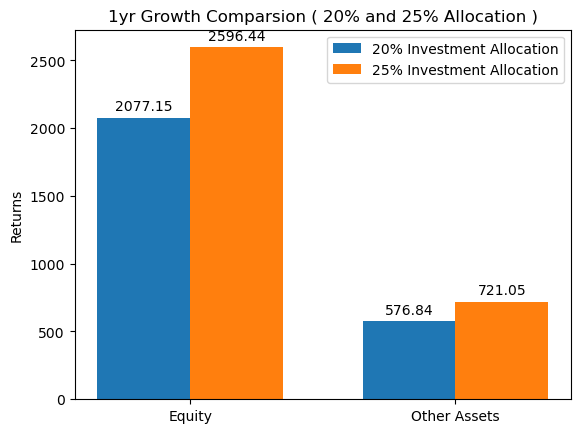

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DataF = pd.read_excel("C:\\Users\\KARTHIK\\OneDrive\\Desktop\\SET2\\FINALDATA.xlsx", engine='openpyxl')

DataF.dropna(subset=['scheme_name'], inplace=True)

DataF['alpha'] = pd.to_numeric(DataF['alpha'], errors='coerce')
DataF['beta'] = pd.to_numeric(DataF['beta'], errors='coerce')

def allocate_funds_based_on_age(person_age, savings):
    equity_percentage = 100 - person_age  
    equity_allocation_amount = savings * (equity_percentage / 100)
    other_assets_allocation_amount = savings - equity_allocation_amount
    return equity_allocation_amount, other_assets_allocation_amount

def calculate_expected_return(person_age, person_monthly_income, equity_allocation_amount, other_assets_allocation_amount):
    person_data = [[person_age, person_monthly_income, 0, 0, 0, 0, 0]]  
    predicted_category = model.predict(person_data)[0]  

    if person_age >= 45:
        selected_funds_equity = DataF[(DataF['category'] == "Equity") & (DataF['Age'] >= 45) & (DataF['rating'].isin([4, 5])) & (DataF['risk_level'].isin([1, 2, 3, 4, 5])) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) >= 0) & (DataF['beta'].astype(float) <= 0.5) & (DataF['fund_age_yr'] > 5)].head(1)
    elif person_age >= 30 and person_age <= 45:
        selected_funds_equity = DataF[(DataF['category'] == "Equity") & (DataF['Age'] >= 30) & (DataF['Age'] <= 50) & (DataF['rating'].isin([3, 4, 5])) & (DataF['risk_level'].isin([1, 2, 3, 4, 5, 6, 7])) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) > 0.5) & (DataF['beta'].astype(float) <= 1) & (DataF['fund_age_yr'] > 2)].head(1)
    else:
        selected_funds_equity = DataF[(DataF['category'] == "Equity") & (DataF['Age'] < 30) & (DataF['rating'].isin([3, 4, 5])) & (DataF['risk_level'].isin(range(1, 11))) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) >= 1) & (DataF['fund_age_yr'] > 2)].head(1)

    if person_age >= 45:
        selected_funds_other = DataF[(DataF['category'] != "Equity") & (DataF['Age'] >= 45) & (DataF['rating'].isin([4, 5])) & (DataF['risk_level'].isin([4, 5])) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) >= 0) & (DataF['beta'].astype(float) <= 0.5) & (DataF['fund_age_yr'] > 5)].head(1)
    elif person_age >= 30 and person_age < 45:
        selected_funds_other = DataF[(DataF['category'] != "Equity") & (DataF['Age'] >= 30) & (DataF['Age'] < 45) & (DataF['rating'].isin([3, 4, 5])) & (DataF['risk_level'].isin([1, 2, 3, 4, 5, 6, 7])) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) > 0.5) & (DataF['beta'].astype(float) <= 1) & (DataF['fund_age_yr'] > 2)].head(1)
    else:
        selected_funds_other = DataF[(DataF['category'] != "Equity") & (DataF['Age'] < 30) & (DataF['rating'].isin([3, 4, 5])) & (DataF['risk_level'].isin(range(1, 11))) & (DataF['alpha'].fillna(0).astype(float) > 0) & (~DataF['beta'].isna()) & (DataF['beta'].astype(float) >= 1) & (DataF['fund_age_yr'] > 2)].head(1)

    equity_return = selected_funds_equity['returns_1yr'].values[0] / 100 * equity_allocation_amount + equity_allocation_amount
    other_assets_return = selected_funds_other['returns_1yr'].values[0] / 100 * other_assets_allocation_amount + other_assets_allocation_amount

    return equity_return, other_assets_return

person_name = input("Enter the name of the person: ")
person_age = int(input("Enter the age of the person: "))
person_monthly_income = float(input("Enter the monthly income of the person: "))

savings = person_monthly_income * 0.20

equity_allocation_amount, other_assets_allocation_amount = allocate_funds_based_on_age(person_age, savings)

savings_25_percent_increase = person_monthly_income * 1.25 * 0.20
equity_allocation_amount_25 = savings_25_percent_increase * (100 - person_age) / 100
other_assets_allocation_amount_25 = savings_25_percent_increase - equity_allocation_amount_25

equity_return_20, other_assets_return_20 = calculate_expected_return(person_age, person_monthly_income, equity_allocation_amount, other_assets_allocation_amount)
equity_return_25, other_assets_return_25 = calculate_expected_return(person_age, person_monthly_income * 1.25, equity_allocation_amount_25, other_assets_allocation_amount_25)

categories = ['Equity', 'Other Assets']
returns_20 = [equity_return_20, other_assets_return_20]
returns_25 = [equity_return_25, other_assets_return_25]

x = np.arange(len(categories))  
width = 0.35 

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, returns_20, width, label='20% Investment Allocation')
bars2 = ax.bar(x + width/2, returns_25, width, label='25% Investment Allocation')

ax.set_ylabel('Returns')
ax.set_title('1yr Growth Comparsion ( 20% and 25% Allocation )')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bars1)
autolabel(bars2)

plt.show()

Enter the age of the person: 23
Enter the monthly income of the person: 12000


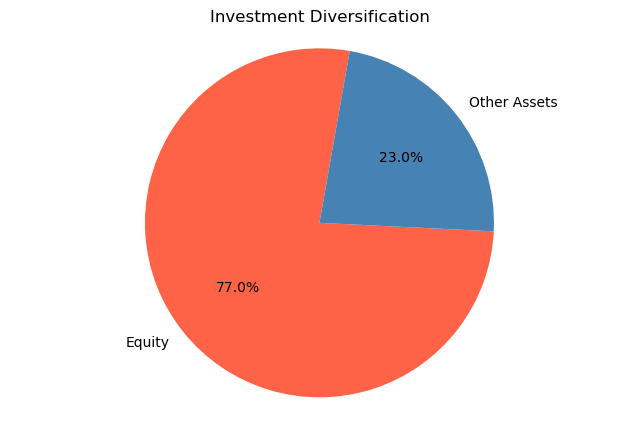

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DataF = pd.read_excel("C:\\Users\\KARTHIK\\OneDrive\\Desktop\\SET2\\FINALDATA.xlsx", engine='openpyxl')

DataF.dropna(subset=['scheme_name'], inplace=True)

DataF['alpha'] = pd.to_numeric(DataF['alpha'], errors='coerce')
DataF['beta'] = pd.to_numeric(DataF['beta'], errors='coerce')

def allocate_funds_based_on_age(person_age, savings):
    equity_percentage = 100 - person_age  
    equity_allocation_amount = savings * (equity_percentage / 100)
    other_assets_allocation_amount = savings - equity_allocation_amount
    return equity_allocation_amount, other_assets_allocation_amount

person_age = int(input("Enter the age of the person: "))
person_monthly_income = float(input("Enter the monthly income of the person: "))

savings_20_percent = person_monthly_income * 0.20

equity_allocation_amount_20, other_assets_allocation_amount_20 = allocate_funds_based_on_age(person_age, savings_20_percent)

labels = ['Equity', 'Other Assets']
sizes = [equity_allocation_amount_20, other_assets_allocation_amount_20]
colors = ['#FF6347', '#4682B4']  

plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=80)
plt.title('Investment Diversification')
plt.axis('equal')  
plt.show()


In [24]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier


X_test = np.nan_to_num(X_test, nan=0, posinf=1e9, neginf=-1e9)
y_test = np.nan_to_num(y_test, nan=0, posinf=1e9, neginf=-1e9)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.77
Precision: 0.76
Recall: 0.77
F1-score: 0.74
